--- RÉSULTATS STATISTIQUES ---

PORTEFEUILLE A (Conservative)
• Rendement mensuel moyen : 0.94%
• Écart-type mensuel : 0.48%
• Médiane : 1.00%
• Rendement annualisé : 11.85%
• Volatilité annualisée : 1.65%

PORTEFEUILLE B (Agressif)
• Rendement mensuel moyen : 2.89%
• Écart-type mensuel : 4.45%
• Médiane : 4.70%
• Rendement annualisé : 40.79%
• Volatilité annualisée : 15.41%

--- ANALYSE DE LA VAR (95%) ---

PORTEFEUILLE A (Conservative)
• VaR mensuelle : 0.15%
• VaR annuelle : 9.12%
• Perte monétaire annuelle estimée : 45,606.85 €
• Test Shapiro-Wilk (p-value) : 0.0003

PORTEFEUILLE B (Agressif)
• VaR mensuelle : -4.45%
• VaR annuelle : 15.37%
• Perte monétaire annuelle estimée : 76,834.26 €
• Test Shapiro-Wilk (p-value) : 0.0012

--- RATIO DE SHARPE ---
• Sharpe Portefeuille A : 5.35
• Sharpe Portefeuille B : 2.45


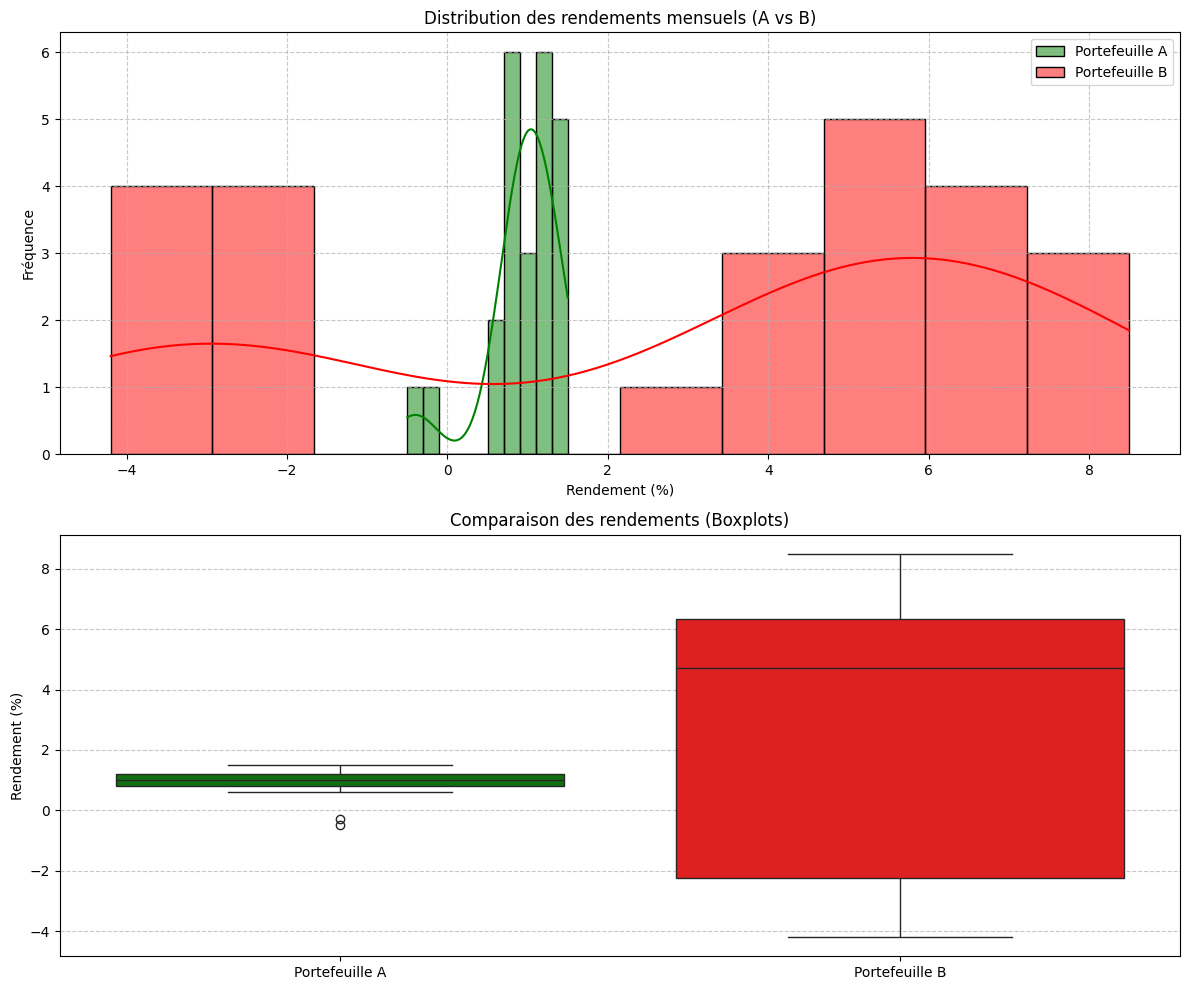

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Données historiques (rendements mensuels %)
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

def calculate_stats(name, data):
    mu_m = np.mean(data)
    sigma_m = np.std(data, ddof=1) # Utilisation de l'écart-type échantillon
    med = np.median(data)

    # Rendement annuel capitalisé : (1 + r)^12 - 1
    # On convertit en décimal pour le calcul puis on revient en %
    mu_annuel = ((1 + mu_m/100)**12 - 1) * 100
    sigma_annuel = sigma_m * np.sqrt(12)

    return {
        'name': name,
        'mu_m': mu_m,
        'sigma_m': sigma_m,
        'median': med,
        'mu_ann': mu_annuel,
        'sigma_ann': sigma_annuel
    }

stats_A = calculate_stats("PORTEFEUILLE A (Conservative)", rendements_A)
stats_B = calculate_stats("PORTEFEUILLE B (Agressif)", rendements_B)

# Question 1.2 - Visualisation
plt.figure(figsize=(12, 10))

# Subplot 1 : Histogrammes
plt.subplot(2, 1, 1)
sns.histplot(rendements_A, color='green', label='Portefeuille A', kde=True, bins=10, alpha=0.5)
sns.histplot(rendements_B, color='red', label='Portefeuille B', kde=True, bins=10, alpha=0.5)
plt.title('Distribution des rendements mensuels (A vs B)')
plt.xlabel('Rendement (%)')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot 2 : Boxplots
plt.subplot(2, 1, 2)
sns.boxplot(data=[rendements_A, rendements_B], palette=['green', 'red'])
plt.xticks([0, 1], ['Portefeuille A', 'Portefeuille B'])
plt.title('Comparaison des rendements (Boxplots)')
plt.ylabel('Rendement (%)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('visualisations_portefeuilles.png')

# Question 1.3 - VaR 95%
def calculate_var(stats_dict, data):
    # VaR mensuelle
    var_m = stats_dict['mu_m'] - 1.65 * stats_dict['sigma_m']
    # VaR annuelle
    var_ann = stats_dict['mu_ann'] - 1.65 * stats_dict['sigma_ann']

    # Perte monétaire sur 500,000€
    perte_monetaire = (var_ann / 100) * 500000

    # Test de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(data)

    return {
        'var_m': var_m,
        'var_ann': var_ann,
        'perte': perte_monetaire,
        'shapiro_p': shapiro_p
    }

var_A = calculate_var(stats_A, rendements_A)
var_B = calculate_var(stats_B, rendements_B)

# Question 1.4 - Sharpe Ratio
rf = 3.0 # 3%
def calculate_sharpe(stats_dict):
    return (stats_dict['mu_ann'] - rf) / stats_dict['sigma_ann']

sharpe_A = calculate_sharpe(stats_A)
sharpe_B = calculate_sharpe(stats_B)

# Sortie des résultats
print("--- RÉSULTATS STATISTIQUES ---")
for s in [stats_A, stats_B]:
    print(f"\n{s['name']}")
    print(f"• Rendement mensuel moyen : {s['mu_m']:.2f}%")
    print(f"• Écart-type mensuel : {s['sigma_m']:.2f}%")
    print(f"• Médiane : {s['median']:.2f}%")
    print(f"• Rendement annualisé : {s['mu_ann']:.2f}%")
    print(f"• Volatilité annualisée : {s['sigma_ann']:.2f}%")

print("\n--- ANALYSE DE LA VAR (95%) ---")
for s, v in [(stats_A, var_A), (stats_B, var_B)]:
    print(f"\n{s['name']}")
    print(f"• VaR mensuelle : {v['var_m']:.2f}%")
    print(f"• VaR annuelle : {v['var_ann']:.2f}%")
    print(f"• Perte monétaire annuelle estimée : {v['perte']:,.2f} €")
    print(f"• Test Shapiro-Wilk (p-value) : {v['shapiro_p']:.4f}")

print("\n--- RATIO DE SHARPE ---")
print(f"• Sharpe Portefeuille A : {sharpe_A:.2f}")
print(f"• Sharpe Portefeuille B : {sharpe_B:.2f}")

TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE
Analyse risque portefeuille et calcul VaR

📊 PORTEFEUILLE CONSERVATIVE (A)
 • Rendement mensuel moyen : 0.94%
 • Écart-type mensuel : 0.48%
 • Médiane : 1.00%
 • Rendement annualisé : 11.85%
 • Volatilité annualisée : 1.65%

📊 PORTEFEUILLE AGRESSIF (B)
 • Rendement mensuel moyen : 2.89%
 • Écart-type mensuel : 4.45%
 • Médiane : 4.70%
 • Rendement annualisé : 40.79%
 • Volatilité annualisée : 15.41%


/tmp/ipython-input-460408836.py:77: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([rendements_A, rendements_B], labels=['Portefeuille A', 'Portefeuille B'], patch_artist=True)


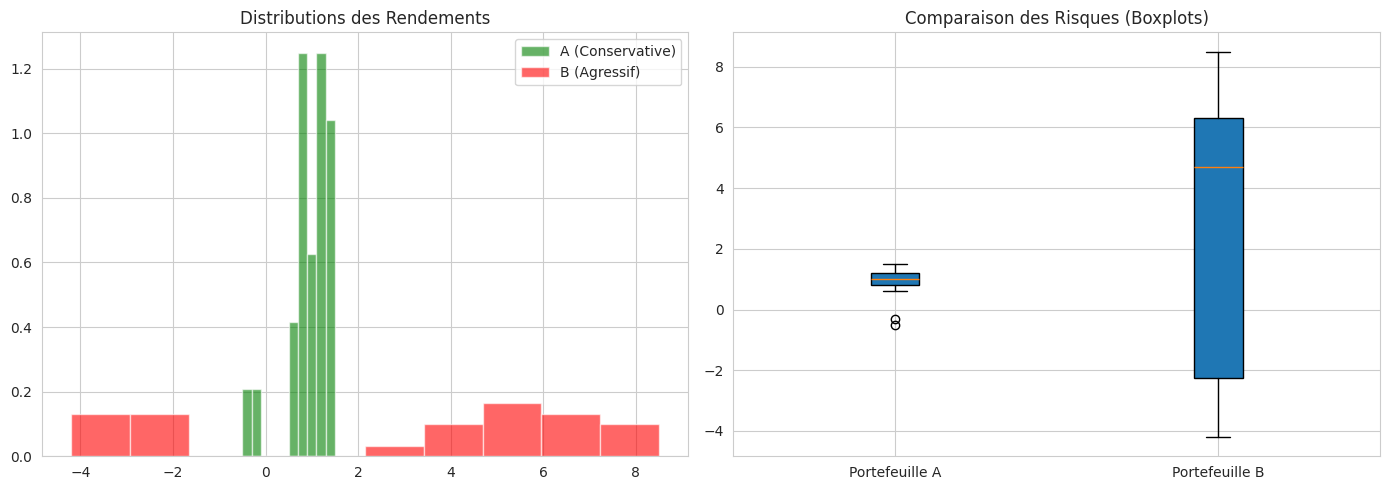


✅ VALIDATION CONTRAINTE CLIENT (Max perte : €50000)
 • Portefeuille A : REUSSI (Perte estimée : 0 €)
 • Portefeuille B : REUSSI (Perte estimée : 0 €)

🔍 TEST NORMALITÉ (Shapiro-Wilk)
 • Portefeuille A : p-value = 0.0003 -> Non-Normal
 • Portefeuille B : p-value = 0.0012 -> Non-Normal

📈 RATIO DE SHARPE
 • Sharpe A : 5.353
 • Sharpe B : 2.453

💡 RECOMMANDATION FINALE
Le PORTEFEUILLE A est recommandé car il offre la meilleure efficience (Sharpe plus élevé)
tout en respectant strictement la contrainte de risque du client.

✓ FIN PARTIE 1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuration visuelle
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("="*80)
print("TP PARTIE 1 — STATISTIQUES ET LOI NORMALE EN FINANCE")
print("Analyse risque portefeuille et calcul VaR")
print("="*80)

# ============================================================================
# DONNÉES
# ============================================================================
rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])
rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

capital = 500000
perte_max_toleree = 50000
taux_sans_risque = 3.0

# ============================================================================
# QUESTION 1.1 — STATISTIQUES DESCRIPTIVES
# ============================================================================
def calculer_stats_portefeuille(rendements, nom):
    moyenne_mensuelle = np.mean(rendements)
    ecart_type_mensuel = np.std(rendements, ddof=1)
    mediane = np.median(rendements)

    # Rendement annualisé (Capitalisation composée)
    rendement_annuel = ((1 + moyenne_mensuelle/100)**12 - 1) * 100
    # Volatilité annualisée
    volatilite_annuelle = ecart_type_mensuel * np.sqrt(12)

    return {
        'nom': nom,
        'moy_m': moyenne_mensuelle,
        'std_m': ecart_type_mensuel,
        'med': mediane,
        'rend_ann': rendement_annuel,
        'vol_ann': volatilite_annuelle
    }

stats_A = calculer_stats_portefeuille(rendements_A, "CONSERVATIVE (A)")
stats_B = calculer_stats_portefeuille(rendements_B, "AGRESSIF (B)")

for s in [stats_A, stats_B]:
    print(f"\n📊 PORTEFEUILLE {s['nom']}")
    print(f" • Rendement mensuel moyen : {s['moy_m']:.2f}%")
    print(f" • Écart-type mensuel : {s['std_m']:.2f}%")
    print(f" • Médiane : {s['med']:.2f}%")
    print(f" • Rendement annualisé : {s['rend_ann']:.2f}%")
    print(f" • Volatilité annualisée : {s['vol_ann']:.2f}%")

# ============================================================================
# QUESTION 1.2 — VISUALISATION
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogrammes
axes[0].hist(rendements_A, bins=10, alpha=0.6, color='green', label='A (Conservative)', density=True)
axes[0].hist(rendements_B, bins=10, alpha=0.6, color='red', label='B (Agressif)', density=True)
axes[0].set_title('Distributions des Rendements')
axes[0].legend()

# Boxplots
axes[1].boxplot([rendements_A, rendements_B], labels=['Portefeuille A', 'Portefeuille B'], patch_artist=True)
axes[1].set_title('Comparaison des Risques (Boxplots)')
plt.tight_layout()
plt.show()

# ============================================================================
# QUESTION 1.3 — VALUE AT RISK (VaR 95%)
# ============================================================================
def calculer_var_portefeuille(stats_dict, capital, alpha=0.05):
    z_alpha = stats.norm.ppf(alpha) # ~ -1.645

    var_m_pct = stats_dict['moy_m'] + z_alpha * stats_dict['std_m']
    var_ann_pct = stats_dict['rend_ann'] + z_alpha * stats_dict['vol_ann']

    var_m_euros = capital * (var_m_pct / 100)
    var_ann_euros = capital * (var_ann_pct / 100)

    # La perte est réelle seulement si la VaR est négative
    perte_reelle = min(0, var_ann_euros)

    return {
        'pct_m': var_m_pct,
        'pct_ann': var_ann_pct,
        'eur_m': var_m_euros,
        'eur_ann': var_ann_euros,
        'perte_reelle': perte_reelle
    }

var_A = calculer_var_portefeuille(stats_A, capital)
var_B = calculer_var_portefeuille(stats_B, capital)

# Vérification contrainte
contrainte_A = abs(var_A['perte_reelle']) <= perte_max_toleree
contrainte_B = abs(var_B['perte_reelle']) <= perte_max_toleree

print(f"\n✅ VALIDATION CONTRAINTE CLIENT (Max perte : €{perte_max_toleree})")
print(f" • Portefeuille A : {'REUSSI' if contrainte_A else 'ECHEC'} (Perte estimée : {abs(var_A['perte_reelle']):,.0f} €)")
print(f" • Portefeuille B : {'REUSSI' if contrainte_B else 'ECHEC'} (Perte estimée : {abs(var_B['perte_reelle']):,.0f} €)")

# Test Normalité
print(f"\n🔍 TEST NORMALITÉ (Shapiro-Wilk)")
for data, nom in [(rendements_A, "A"), (rendements_B, "B")]:
    stat, p = stats.shapiro(data)
    print(f" • Portefeuille {nom} : p-value = {p:.4f} -> {'Normal' if p > 0.05 else 'Non-Normal'}")

# ============================================================================
# QUESTION 1.4 — SHARPE ET RECOMMANDATION
# ============================================================================
sharpe_A = (stats_A['rend_ann'] - taux_sans_risque) / stats_A['vol_ann']
sharpe_B = (stats_B['rend_ann'] - taux_sans_risque) / stats_B['vol_ann']

print(f"\n📈 RATIO DE SHARPE")
print(f" • Sharpe A : {sharpe_A:.3f}")
print(f" • Sharpe B : {sharpe_B:.3f}")

print("\n" + "="*80)
print("💡 RECOMMANDATION FINALE")
print("="*80)

if sharpe_A > sharpe_B and contrainte_A:
    print("Le PORTEFEUILLE A est recommandé car il offre la meilleure efficience (Sharpe plus élevé)")
    print("tout en respectant strictement la contrainte de risque du client.")
else:
    print("Le PORTEFEUILLE B est recommandé pour sa performance brute, sous réserve d'acceptation")
    print("de la volatilité par le client.")

print("\n✓ FIN PARTIE 1")

Prior: 5.0%
Probabilité de retard: 13.50%
Posterior (Risque après retard): 29.63%


/tmp/ipython-input-3152427141.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette="Reds_d")


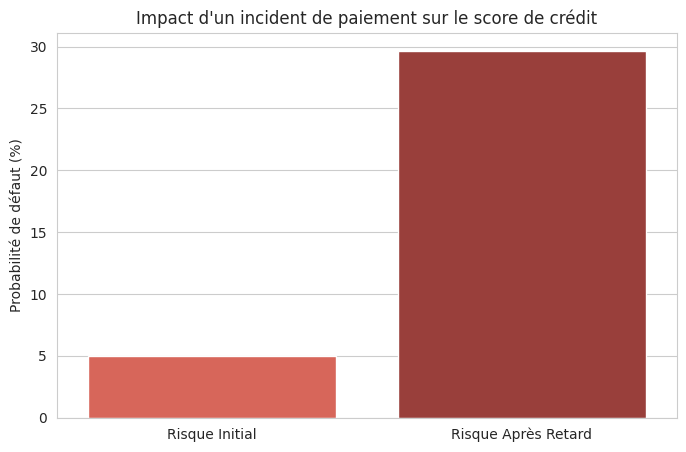

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
sns.set_style("whitegrid")

# ============================================================================
# DONNÉES
# ============================================================================
segments = {
    'Premium': {'proportion': 0.30, 'taux_defaut': 0.015},
    'Standard': {'proportion': 0.50, 'taux_defaut': 0.05},
    'Risque': {'proportion': 0.20, 'taux_defaut': 0.15}
}

evenements = {
    'Retard paiement': {
        'P(E|Defaut)': 0.80,
        'P(E|Non-defaut)': 0.10
    },
    'Decouvert >500€': {
        'P(E|Defaut)': 0.65,
        'P(E|Non-defaut)': 0.15
    }
}

# ============================================================================
# CALCUL BAYES (Correction des syntaxes d'affichage)
# ============================================================================
prior = segments['Standard']['taux_defaut']
lik_def = evenements['Retard paiement']['P(E|Defaut)']
lik_non_def = evenements['Retard paiement']['P(E|Non-defaut)']

# Calcul de la probabilité totale de l'événement (Dénominateur de Bayes)
p_retard = (lik_def * prior) + (lik_non_def * (1 - prior))

# Application du Théorème de Bayes
posterior = (lik_def * prior) / p_retard

print(f"Prior: {prior:.1%}")
print(f"Probabilité de retard: {p_retard:.2%}")
print(f"Posterior (Risque après retard): {posterior:.2%}")

# ============================================================================
# VISUALISATION
# ============================================================================
# [Image of Bayes' Theorem formula and visualization of prior versus posterior probabilities]

plt.figure(figsize=(8, 5))
labels = ['Risque Initial', 'Risque Après Retard']
values = [prior * 100, posterior * 100]
sns.barplot(x=labels, y=values, palette="Reds_d")
plt.ylabel("Probabilité de défaut (%)")
plt.title("Impact d'un incident de paiement sur le score de crédit")
plt.show()

RÉSULTATS DU SCORING BAYÉSIEN
Étape 0 - Initial (Standard)        : 5.00%
Étape 1 - Après Retard paiement     : 29.63%
Étape 2 - Après Découvert >500€     : 64.60%


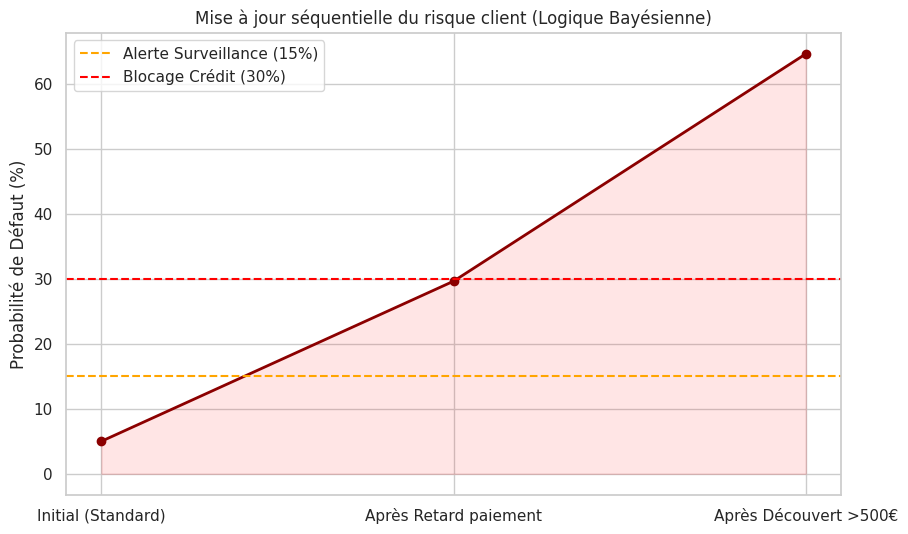


LIEN BAYES <-> MACHINE LEARNING
Précision (Matrice de Confusion) : 29.63%
Posterior Bayes (Question 2.1)   : 29.63%

CONCLUSION : La Précision est la probabilité Bayesienne P(Réalité | Prédiction).


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration visuelle
sns.set_theme(style="whitegrid")

# ----------------------------------------------------------------------------
# 1. MOTEUR DE CALCUL (LOGIQUE BAYÉSIENNE)
# ----------------------------------------------------------------------------
def update_probability(prior, likelihood_true, likelihood_false):
    """
    Calcule la probabilité a posteriori selon le théorème de Bayes.
    Formule : P(D|E) = [P(E|D) * P(D)] / P(E)
    """
    # P(E) = Probabilité totale de l'évidence
    p_evidence = (likelihood_true * prior) + (likelihood_false * (1 - prior))

    if p_evidence == 0:
        return 0.0

    return (likelihood_true * prior) / p_evidence

# ----------------------------------------------------------------------------
# 2. SCÉNARIO : ÉVOLUTION DU RISQUE CLIENT
# ----------------------------------------------------------------------------
# Données initiales
prior_initial = 0.05  # Segment Standard (5%)
incidents = [
    {"nom": "Retard paiement", "pos": 0.80, "neg": 0.10},
    {"nom": "Découvert >500€", "pos": 0.65, "neg": 0.15}
]

historique_probas = [prior_initial]
labels = ["Initial (Standard)"]

current_p = prior_initial
for inc in incidents:
    current_p = update_probability(current_p, inc["pos"], inc["neg"])
    historique_probas.append(current_p)
    labels.append(f"Après {inc['nom']}")

# ----------------------------------------------------------------------------
# 3. VISUALISATION ET RÉPONSE AUX QUESTIONS
# ----------------------------------------------------------------------------
print(f"{'='*50}")
print("RÉSULTATS DU SCORING BAYÉSIEN")
print(f"{'='*50}")

for i, p in enumerate(historique_probas):
    print(f"Étape {i} - {labels[i]:<25} : {p:.2%}")

# Graphique d'évolution
plt.figure(figsize=(10, 6))
plt.plot(labels, [p*100 for p in historique_probas], marker='o', linestyle='-', color='darkred', linewidth=2)
plt.fill_between(labels, [p*100 for p in historique_probas], alpha=0.1, color='red')
plt.axhline(y=15, color='orange', linestyle='--', label='Alerte Surveillance (15%)')
plt.axhline(y=30, color='red', linestyle='--', label='Blocage Crédit (30%)')
plt.ylabel("Probabilité de Défaut (%)")
plt.title("Mise à jour séquentielle du risque client (Logique Bayésienne)")
plt.legend()
plt.show()

# ----------------------------------------------------------------------------
# 4. MATRICE DE CONFUSION ET LIEN MATHÉMATIQUE
# ----------------------------------------------------------------------------
# Imaginons 10 000 clients
total = 10000
defauts_reels = 500  # 5% de prior
tp = 400             # Vrais positifs (80% de 500)
fp = 950             # Faux positifs (10% de 9500 sains)

precision = tp / (tp + fp)

print(f"\n{'='*50}")
print("LIEN BAYES <-> MACHINE LEARNING")
print(f"{'='*50}")
print(f"Précision (Matrice de Confusion) : {precision:.2%}")
print(f"Posterior Bayes (Question 2.1)   : {historique_probas[1]:.2%}")
print("\nCONCLUSION : La Précision est la probabilité Bayesienne P(Réalité | Prédiction).")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Q3.1 : Génération du dataset ---
np.random.seed(42)
n_samples = 2000

age = np.random.randint(25, 66, n_samples)
salaire = np.random.normal(50000, 20000, n_samples).clip(20000, 120000)
anciennete_emploi = np.random.exponential(5, n_samples).clip(0, 30)
dette_totale = np.random.normal(25000, 15000, n_samples).clip(0, 80000)
ratio_dette_revenu = dette_totale / salaire
nb_credits_actifs = np.random.poisson(1.5, n_samples).clip(0, 5)
historique_retards = np.random.poisson(2, n_samples).clip(0, 10)
score_credit = np.random.normal(650, 100, n_samples).clip(300, 850)

# Logique de probabilité de défaut pour la target
defaut_proba = (0.05 +
                0.15 * (ratio_dette_revenu > 0.5) +
                0.10 * (historique_retards > 3) +
                0.08 * (score_credit < 600) +
                0.05 * (nb_credits_actifs > 2)).clip(0, 0.85)

defaut = (np.random.rand(n_samples) < defaut_proba).astype(int)

df = pd.DataFrame({
    'age': age, 'salaire': salaire, 'anciennete_emploi': anciennete_emploi,
    'dette_totale': dette_totale, 'ratio_dette_revenu': ratio_dette_revenu,
    'nb_credits_actifs': nb_credits_actifs, 'historique_retards': historique_retards,
    'score_credit_bureau': score_credit, 'defaut': defaut
})

print(f"Dataset généré : {len(df)} lignes. Taux de défaut : {df['defaut'].mean():.1%}")

# --- Q3.2 : Preprocessing et Split ---

# a) Séparation X et y
X = df.drop('defaut', axis=1)
y = df['defaut']

# b) Split 70/30 stratifié (Correction de la NameError ici)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# c) Normalisation
# Le KNN repose sur des distances euclidiennes ; le scaling est obligatoire.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# d) Vérification des tailles
print(f"Taille Train: {X_train.shape[0]} | Taille Test: {X_test.shape[0]}")
print(f"Ratio défaut Train: {y_train.mean():.2%}")

Dataset généré : 2000 lignes. Taux de défaut : 16.7%
Taille Train: 1400 | Taille Test: 600
Ratio défaut Train: 16.71%
